In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

In [9]:
df_market_data.head(2)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023


### Prepare the Data

In [11]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [15]:
# Create a DataFrame with the scaled data
data_scaled_df = pd.DataFrame(
    data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])

# Copy the crypto names from the original data
data_scaled_df["coin_id"] = df_market_data.index

# Set the newly created Ticker column as index of the df_stocks_scaled DataFrame
data_scaled_df = data_scaled_df.set_index("coin_id")

# Set the coinid column as index


# Display sample data
data_scaled_df.head(6)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533


---

### Find the Best Value for k Using the Original Data.

/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

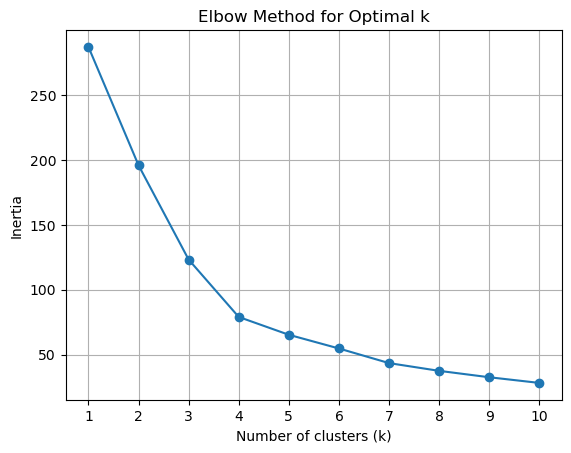

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming data_scaled_df contains the scaled data with the coin_id set as index

# Step 1: Create a list with the number of k values from 1 to 11
k_values = range(1, 11)

# Step 2: Create an empty list to store the inertia values
inertia_values = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia_values.append(kmeans.inertia_)

# Step 4: Create a dictionary with the data to plot the elbow curve
elbow_data = {"Number of clusters (k)": k_values, "Inertia": inertia_values}

# Step 5: Plot a line chart with all the inertia values computed with the different values of k
plt.plot(elbow_data["Number of clusters (k)"], elbow_data["Inertia"], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Seven 7 

### Cluster Cryptocurrencies with K-means Using the Original Data

In [24]:


# Step 1: Initialise the K-means model with the best value for k
best_k = 7
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Step 2: Fit the K-means model using the original scaled DataFrame
kmeans.fit(data_scaled_df)

# Step 3: Predict the clusters to group the cryptocurrencies using the original scaled DataFrame
clusters = kmeans.predict(data_scaled_df)

# Step 4: Create a copy of the original data and add a new column with the predicted clusters
clustered_data = data_scaled_df.copy()
clustered_data['Cluster'] = clusters

# Step 5: Create a scatter plot using hvPlot
scatter_plot = clustered_data.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
    width=800,
    height=400,
    legend='top_right'
)

# Show the scatter plot
scatter_plot


/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [25]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming data_scaled_df contains the scaled data with the coin_id set as index

# Step 1: Perform PCA and reduce the features to three principal components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data_scaled_df)

# Step 2: Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance)

# Step 3: Create a new DataFrame with the PCA data
pca_columns = [f"PC{i+1}" for i in range(len(explained_variance))]
pca_df = pd.DataFrame(pca_data, columns=pca_columns, index=data_scaled_df.index)

# Display the total explained variance
print("Total explained variance of the three principal components:", total_explained_variance)

# Display the first five rows of the PCA DataFrame
print("\nThe first five rows of the PCA DataFrame:")
print(pca_df.head())


Total explained variance of the three principal components: 0.895031657030984

The first five rows of the PCA DataFrame:
                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [27]:
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance of the three principal components: 0.895031657030984 (89%)

---

### Find the Best Value for k Using the PCA Data

/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

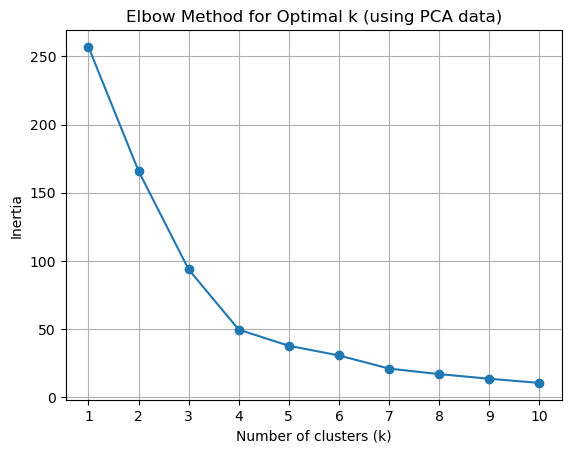

Best value for k when using the PCA data: 4


In [32]:


# Step 1: Create a list with the number of k-values from 1 to 11
k_values = range(1, 11)

# Step 2: Create an empty list to store the inertia values
inertia_values = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)

# Step 4: Create a dictionary with the data to plot the Elbow curve
elbow_data = {"Number of clusters (k)": k_values, "Inertia": inertia_values}

# Step 5: Plot a line chart with all the inertia values computed with the different values of k
plt.plot(elbow_data["Number of clusters (k)"], elbow_data["Inertia"], marker='o')
plt.title('Elbow Method for Optimal k (using PCA data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k_pca = 4  
print("Best value for k when using the PCA data:", best_k_pca)


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The Slope is a bit different and we can conclude that the best K is 4 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [35]:

# Step 1: Initialise the K-means model with the best value for k
best_k_pca = 4  # Example: Best value for k obtained from elbow method on PCA data
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)

# Step 2: Fit the K-means model using the PCA data
kmeans_pca.fit(pca_df)

# Step 3: Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_df)

# Step 4: Create a copy of the DataFrame with the PCA data and add a new column to store the predicted clusters
clustered_pca_data = pca_df.copy()
clustered_pca_data['Cluster'] = clusters_pca

# Step 5: Create a scatter plot using hvPlot
scatter_plot_pca = clustered_pca_data.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    width=800,
    height=400,
    legend='top_right'
)

# Show the scatter plot
scatter_plot_pca


/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Masih/anaconda3/envs/devv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

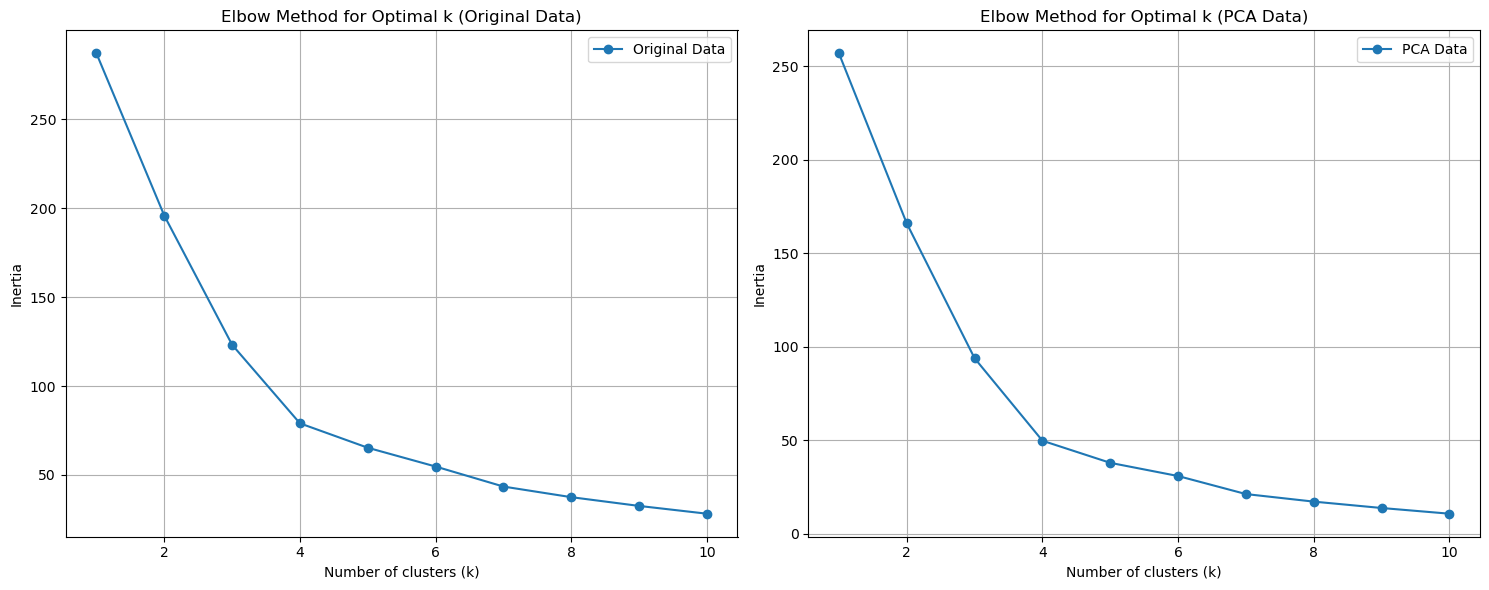

In [37]:

# Step 1: Create a list with the number of k-values from 1 to 11
k_values = range(1, 11)

# Step 2: Create empty lists to store the inertia values for both original and PCA data
inertia_values_original = []
inertia_values_pca = []

# Step 3: Create a for loop to compute the inertia with each possible value of k for original data
for k in k_values:
    kmeans_original = KMeans(n_clusters=k, random_state=42)
    kmeans_original.fit(data_scaled_df)
    inertia_values_original.append(kmeans_original.inertia_)

# Step 4: Create a for loop to compute the inertia with each possible value of k for PCA data
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(pca_df)
    inertia_values_pca.append(kmeans_pca.inertia_)

# Step 5: Plot the composite plot to contrast the elbow curves
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for original data
axs[0].plot(k_values, inertia_values_original, marker='o', label='Original Data')
axs[0].set_title('Elbow Method for Optimal k (Original Data)')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)
axs[0].legend()

# Plot for PCA data
axs[1].plot(k_values, inertia_values_pca, marker='o', label='PCA Data')
axs[1].set_title('Elbow Method for Optimal k (PCA Data)')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Inertia')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** IT Simpliifies the Cluster Structure, Improve is usage, and Reduce information content or dimensions